Primero veamos qué tanto incluye la base de datos

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('spotify.csv', index_col=0)

print('Cantidad de datos:', len(data))
print('Tipos de datos:')
print(data.dtypes)

Cantidad de datos: 114000
Tipos de datos:
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


Para los artistas, se me ocurre analizar la cantidad de colaboraciones

Cantidad total de colaboraciones: 44293


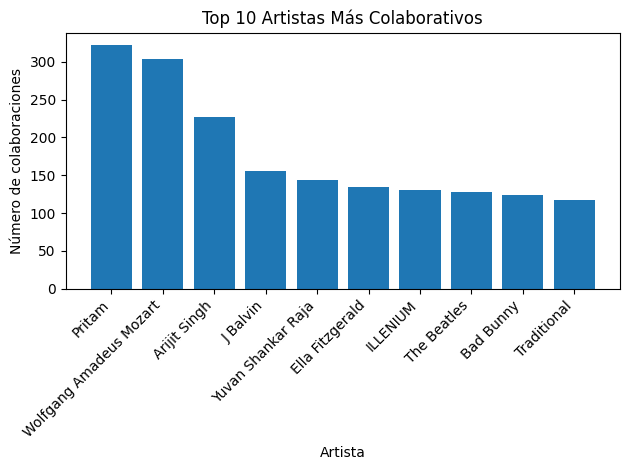

In [156]:
# ARTISTS
exp_data = data.assign(artists=data['artists'].str.split(';')).explode('artists') # De una vez la explotamos para analizarla mejor

# Identifica primero cuáles canciones tienen más de un artista
collab_songs = exp_data.assign(artist_count = exp_data.groupby('track_id')['artists'].transform('count')).query('artist_count > 1')

# Ahora revisa en cuántas de esas canciones aparece qué artista
collab_count = collab_songs.groupby('artists')['track_id'].nunique().sort_values(ascending=False)

print('Cantidad total de colaboraciones:', len(exp_data) - len(data))

# Top 10 artistas más colaborativos
plt.bar(collab_count.head(10).index, collab_count.head(10).values)
plt.title('Top 10 Artistas Más Colaborativos')
plt.xlabel('Artista')
plt.ylabel('Número de colaboraciones')
plt.xticks(rotation=45, ha='right') # que se vean bien los nombres
plt.tight_layout()
plt.show()

Para la popularidad podemos analizar la popularidad de las canciones del artista y le sacamos el promedio

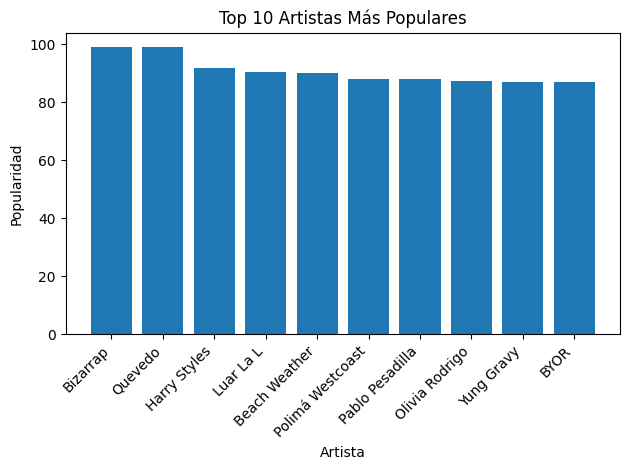

In [157]:
# POPULARITY
# Aquí podemos analizar la popularidad 'total' que tiene cada artista
artist_groups = exp_data.groupby('artists', as_index=False) # Agrupamos a las canciones por artistas
atrist_groups = artist_groups.agg(song_count = ('track_id', 'count'),
                                  avg_popularity = ('popularity', 'mean')) # Añadimos estos encabezados
atrist_groups = atrist_groups.sort_values('avg_popularity', ascending=False).reset_index() # Y los ordenamos

# Top 10 artistas más populares
plt.bar(atrist_groups['artists'].head(10), atrist_groups['avg_popularity'].head(10))
plt.title('Top 10 Artistas Más Populares')
plt.xlabel('Artista')
plt.ylabel('Popularidad')
plt.xticks(rotation=45, ha='right') # que se vean bien los nombres
plt.tight_layout()
plt.show()

Para el resto solamente se me ocurre hacer moda, media y mediana

In [160]:
# DURATION
print(f'Duración promedio de una canción: {round(data['duration_ms'].mean() / 1000, 2)} segundos')

# DANCEABILITY
print(f'Bailabilidad promedio de una canción: {round(data['danceability'].mean() * 100)}%')

# ENERGY
print(f'Energía promedio de una canción: {round(data['energy'].mean() * 100)}%')

# KEY & MODE
key_map = {
    0: 'Do',
    1: 'Do# / Reb',
    2: 'Re',
    3: 'Re# / Mib',
    4: 'Mi',
    5: 'Fa',
    6: 'Fa# / Solb',
    7: 'Sol',
    8: 'Sol# / Lab',
    9: 'La',
    10: 'La# / Sib',
    11: 'B'
}

mode_map = {
    0: 'Menor',
    1: 'Mayor'
}

# Para ser un lenguaje que se supone que es amigable, python tiene el peor readability de la historia frfr
most_popular_tone = data.apply(lambda row: f"{key_map[row['key']]} {mode_map[row['mode']]}", axis=1).value_counts().idxmax()
print("Todalidad más popular:", most_popular_tone)

# LOUDNESS
print(f'Volúmen promedio de una canción: {round(data['loudness'].mean(), 2)} dB')

# SPEECHINESS
print(f'Hablabilidad (?) promedio de una canción: {round(data['speechiness'].mean() * 100)}%')

# ACOUSTICNESS
print(f'Acusticalidad promedio de una canción: {round(data['acousticness'].mean() * 100)}%')

# INSTRUMENTALNESS
print(f'Instrumentalidad promedio de una canción: {round(data['instrumentalness'].mean() * 100)}%')

# LIVENESS
print(f'En vivo (?) promedio de una canción: {round(data['liveness'].mean() * 100)}%')

# VALENCE
print(f'Valencia promedio de una canción: {round(data['valence'].mean() * 100)}%')

# TEMPO
print(f'Tempo promedio de una canción: {round(data['tempo'].mean(), 2)} bps')

# TIME SIGNATURE
print(f'Ritmo más polular: {data['time_signature'].mode()[0]}/4')

Duración promedio de una canción: 228.03 segundos
Bailabilidad promedio de una canción: 57%
Energía promedio de una canción: 64%
Todalidad más popular: Do Mayor
Volúmen promedio de una canción: -8.26 dB
Hablabilidad (?) promedio de una canción: 8%
Acusticalidad promedio de una canción: 31%
Instrumentalidad promedio de una canción: 16%
En vivo (?) promedio de una canción: 21%
Valencia promedio de una canción: 47%
Tempo promedio de una canción: 122.15 bps
Ritmo más polular: 4/4
